# 4. Exploring Scipy and other python packages

There are things which, as scientists, we are all likely to need to do at some point which we haven't covered yet e.g. fitting a function to some data. However, the challenge with a module like this is that one could spend forever looking in depth at different python packages of which there are quadrillions! The problem with this is twofold:

- You'll probably use very little of the small subset of things we look at
- You probably will need some things that we don't look at!

Up to this point we've tried to provide you with a good grounding in fundamental concepts in both python and foundational packages like numpy, matplotlib. This grounding means you can understand good documentation and therefore can take advantage of packages which you've never used before. Ultimately becoming a good programmer is about using what you do know to teach yourself new things as and when you need them. This isn't always easy but it is ultimately about practise (programming is a skill).

## 4.1 Scipy

Perhaps the most famous package we have yet to cover is <a href="https://docs.scipy.org/doc/scipy/">scipy</a>. This has a wide range of scientific and numerical computing tools with specialist modules which cover different areas:

        scipy.integrate: Integration techniques and solvers for ordinary differential equations.
        scipy.optimize: Optimization algorithms for finding the minimum or maximum of functions.
        scipy.stats: Statistical distributions, hypothesis testing, and descriptive statistics.
        scipy.linalg: Linear algebra operations and matrix decompositions.
        scipy.signal: Signal processing tools such as filtering, spectral analysis, and wavelet transforms.
        scipy.sparse: Sparse matrix data structures and linear algebra operations on sparse matrices.
        scipy.interpolate: Interpolation techniques for 1-D and N-D data.
        scipy.special: Special mathematical functions like Bessel functions, gamma functions, etc.

In the case of SciPy there is also a very useful resource called the <a href="https://scipy-cookbook.readthedocs.io/">SciPy Cookbook</a> which gives many examples of solving common scientific problems using Scipy and related libraries. I recommend at this point having a quick flick through this page to get a sense of the range of problems scipy can be used to solve.

We will cover two common tasks (curve fitting, numeical integration) but leave you more exercises. In solving these problems we will try to explain the process we go through in understanding how to use the packages that are available.        

### 4.1.1 Example 1 - Curve fitting with Scipy

Suppose our experiment produces a noisy periodic signal which our model suggests should be a 2Hz sin wave centred around y=0 but with unknown amplitude or phase.

Text(0, 0.5, 'Signal')

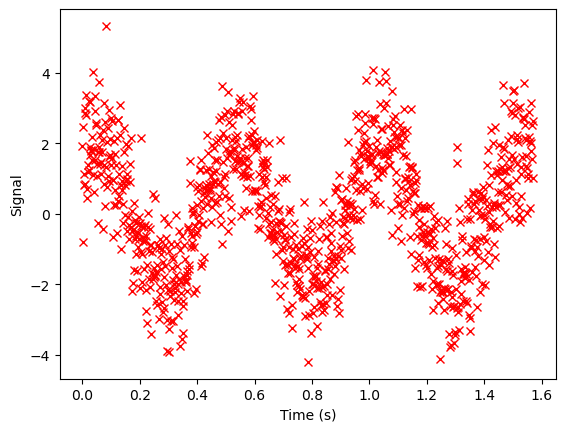

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Here we generate the "noisy sin wave" but the challenge normally would be to work out what these numbers were from the raw data.
amplitude = 2
phase = np.pi/3
freq=2
numpts=1000
noise=2
tdata = np.linspace(0,np.pi/2, numpts)
experimental_data = amplitude*np.sin(2*np.pi*freq*tdata + phase) + noise*np.random.normal(0,0.5,numpts)

plt.plot(tdata, experimental_data, 'rx')
plt.xlabel('Time (s)')
plt.ylabel('Signal')


One way to go about this is to try and fit a model of a sine wave to the data and extract the fit parameters to find out what the phase and amplitude are. It might take a little google search but I quickly find a function in scipy Optimize toolbox which seems appropriate:

<a href = "https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html">Curve fit</a>

Have a look at the docs. What stands out? Here were my observations:

- Assumes ydata=f(xdata, *params) + eps

The equation I want to fit has to have this format. Ours does. That's not always the case. If I had a circle which was R^2 = x^2 + y^2 I'd need to rearrange or possibly look at another function. I'm not really sure what eps stands for. 

- The first parameter is a function, so I will need to send a function to this function. This function has to have a format which takes xdata as first input and then the coefficients as the other inputs. If I scroll down to look at the first example this confirms what I was thinking.
- I need to supply x and y data to be fit
- p0 means I need to supply initial guesses for the coefficients in my function. This is an optional argument so I might get away without supplying any as a first attempt.
- It returns two things. `popt` is the optimal values of the coefficients which is what I want. `pcov` I'm not interested in at the moment.

#### A minimal working example

Next I wouldn't try to solve my problem which might be a bit complicated, but I'd just try and get a feel for using this library with the simplest possible setup. The simplest function I could fit is a straight line. I therefore make up some test data that forms a perfect straight line.

In [2]:
import numpy as np
from scipy.optimize import curve_fit

xdata = np.array([1,2,3,4])
ydata = np.array([1,2,3,4])

def straight_line(xdata, m, c):
    """Equation straight line y=mx+c"""
    ydata = m*xdata+c
    return ydata

popt, _ = curve_fit(straight_line, xdata, ydata)    #   Note _ receives pcov because not interested
print(popt)



[ 1.0000000e+00 -2.1808451e-12]


It returns a gradient of 1 and an intercept that is very close to zero and only differs due to finite precision. Now we are confident using this function lets build the model we *are* interested in.

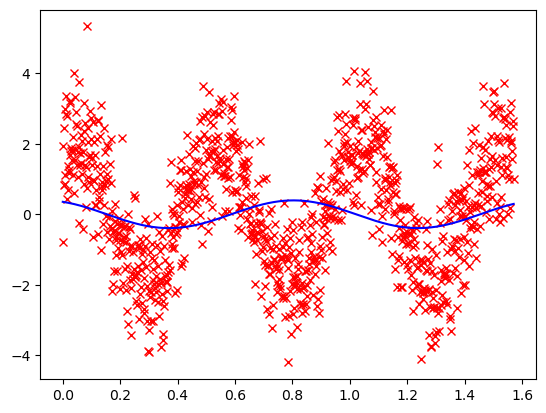

In [3]:
from scipy.optimize import curve_fit
import numpy as np

def general_sinwave(tdata, amplitude, freq, phase):
    """A function to generate a general sinwave centred about y=0"""
    ydata = amplitude*np.sin(2*np.pi*freq*tdata + phase)
    return ydata

# Note I'm not interested in pcov so I assign it to _ to make this transparent
popt, _ = curve_fit(general_sinwave, tdata, experimental_data)

amplitude, freq, phase = popt   #   Use unpacking

plt.plot(tdata, experimental_data, 'rx')    #   The "experiment data"
plt.plot(tdata, general_sinwave(tdata, amplitude, freq, phase),'b-')    #   The fit to the data


oh dear! Not great. Go back to the docs. The initial guess `p0` was originally `None` but let's try and estimate those things we know. We know the frequency is going to be 2Hz. Looking at the docs there is also a parameter `bounds` which allows me to specify the min and max values a param can take. The format is a 2 tuple of arrays. To double check I get this format right I have a look at the examples.     

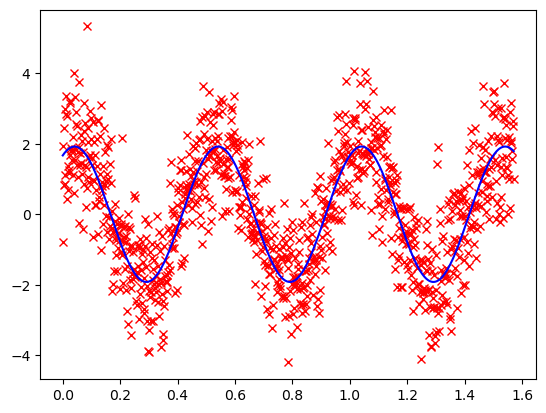

In [4]:
popt, _ = curve_fit(general_sinwave, tdata, experimental_data, p0=[4, 2, 0], bounds=([0.5,1.9999,0],[5,2.0001,2*np.pi]))

amplitude, freq, phase = popt   #   Use unpacking

plt.plot(tdata, experimental_data, 'rx')
plt.plot(tdata, general_sinwave(tdata, amplitude, freq, phase),'b-')


This gives a really nice fit. 

In this example I've overly laboured the point about interacting with the docs. I'll spare you this from now on, but this is the kind of approach that enables you to start with no clue how to use something and relatively quickly get to using it. It often doesn't quite work first time but this too is part of programming. Learning from what goes wrong and fixing it.

### 4.1.2 Example 2 - Numerical integration

In this example we'll numerically integrate a function between two limits. Take a <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html">look at the "quad" docs</a> and see if you could piece together how you would use it.

In [5]:
from scipy.integrate import quad    # one-dimensional integration (first argument is variable of interest)

#  Quick oneliner lambda function. 
#  Note func_to_integrate isn't called because there are no brackets.
func_to_integrate = lambda x : x**3 + 3     

lower_limit = 1
upper_limit = 5

#  Numerical integration answer
result_integral, _ = quad(func_to_integrate, lower_limit, upper_limit)
print(result_integral)

#  cf with analytical answer
analytical_func = lambda x : x**4 / 4 + 3*x
print(analytical_func(upper_limit) - analytical_func(lower_limit))


168.0
168.0


## 4.2 Image Processing with scikit-image

There are multiple libraries worth exploring. Two big projects are <a href="https://scikit-image.org/">scikit-image</a> and <a href="https://docs.opencv.org/4.8.0/">OpenCV</a>. 

*OpenCV is written in c++ but you can use python wrappers to use it.*

*Confusingly although its called scikit-image the import statement uses skimage*

Text(0.5, 1.0, 'canny edge filter')

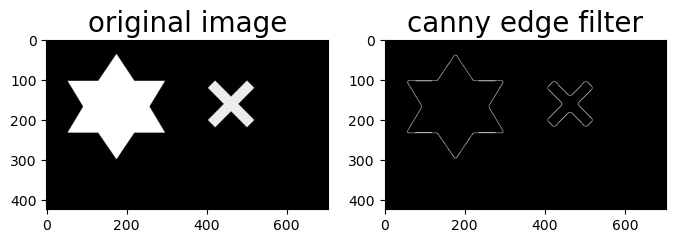

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature


# Import an image
from skimage import io
image = io.imread('resources/images/edges.png')[:,:,0]

# Compute the Canny filter for two values of sigma
edges = feature.canny(image, sigma=3)

# display results
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('original image', fontsize=20)

ax[1].imshow(edges, cmap='gray')
ax[1].set_title(r'canny edge filter', fontsize=20)


## 4.3 Using requests package and NASA API to grab images from NASA server

This next example is a little bit more challenging but shows you how working from your computer you can interact with data held on the other side of the world! The info I needed was found at <a href="https://api.nasa.gov/">Nasa's API page</a>. Select `Browse APIs` and then expand the APOD (Astronomy Picture of the Day). The table tells you about information you can send or request. 

The <a href="https://requests.readthedocs.io/en/latest/">requests package</a> is a python package that allows you to send http requests. This effectively enables you to interrogate particular web sites / servers and receive information back. Many software tools (Microsoft Office365, ChatGPT), have an API (application programming interface). the api is your way to run these tools. Most of these tools require some authentication (see api_keys below) and then use a json format to send and receive information. The `GET` request is the one we are interested in. This is the request you send to the server to get information back. The `GET` request is the most common type of request. The `POST` request is the other common type of request. This is where you send information to the server.

To have a go at this you'll need to register with NASA and <a href="https://api.nasa.gov/">get an api key</a>. 

**Be careful with API_KEYS. If someone has your API_KEY they can access resources and pretend to be you. Store your API_KEY somewhere else on your computer and load it. Don't hard code it in and don't upload it anywhere like github.**

I've stored my API_KEY in a file called nasa_api_key.json. I would do similar things with usernames and passwords. I opened a text editor and added the following. 
        {"API_KEY":"ASKDJNNwenn232kjndskjslkj2"}

(note the above is not really my API key ;-) .json is the file ending indicating the type of data stored in the file. Be careful to select *all files* when saving, or you can inadvertantly end up with a file called filename.json.txt

Then in the program import the API_KEY

In [7]:
import json
import os

# This little trick grabs the current user which you can then slot into your filepath. I use this because my username is different on my home and work computer.
user_profile = os.environ['USERPROFILE']
#For MAC or LINUX this is user_profile = os.environ['HOME']

# You'll need to modify this path to the place you've stored yours.
apikey_filepath = user_profile + '/OneDrive - The University of Nottingham/Documents/Programming/credentials/nasa_api_key.json'
with open(apikey_filepath) as f:
    apikey = json.loads(f.read())['API_KEY']


Now we write a function that takes a keyword argument date in format 'YYYY-MM-DD'. The function uses the <a href="https://requests.readthedocs.io/en/latest/">requests package</a> and <a href="https://api.nasa.gov/">Nasa's API</a> to print the description of Nasa's Astronomy Picture of the Day in the terminal. It then offers the user a choice: "Do you want to view this picture? (Y or N). The python inbuilt function <a href="https://docs.python.org/3/library/functions.html#input">input</a> is used to get user input to a question. If the user types Y then it finds the url of the picture and uses the library <a href="https://docs.python.org/3/library/webbrowser.html">webbrowser</a> to open the picture.

*Note json.loads can turn a string that looks like a dictionary into a python dictionary*

In [8]:
import requests
import webbrowser
import json

def nasa_apod(date='2023-01-01'):
    json_request = {'date':'2023-01-01', 'api_key':apikey}
    data =requests.get('https://api.nasa.gov/planetary/apod',params=json_request)
    
    description = json.loads(data.text)['explanation']
    url =json.loads(data.text)['url']
    
    # commented next section to avoid user interaction
    want_to_view=input(description + '\n\n Would you like to view the image? (Y / N)')   
    want_to_view = want_to_view.upper().lstrip()
    if want_to_view[0] == 'Y':
        print('Opening image')
        chrome = webbrowser.get()
        chrome.open(url)
    return url

url = nasa_apod(date='2023-01-01')
print(url)


IndexError: string index out of range

In [1]:
from llamaapi import LlamaAPI
import json
import pprint
import os

# This little trick grabs the current user which you can then slot into your filepath. I use this because my username is different on my home and work computer.
user_profile = os.environ['USERPROFILE']
credentials = user_profile + "/OneDrive - The University of Nottingham/Documents/Programming/credentials/llama_api_key.json"
with open(credentials) as f:
    llama = LlamaAPI(json.loads(f.read())['API_KEY'])

# API Request JSON Cell
api_request_json = {
  "model": "llama3-70b",
  "messages": [
    {"role": "system", "content": "You are a philosophical type who never gets round to really answering the question."},
    {"role": "user", "content": "Why is the sky blue?"},
  ]
}

# Make your request and handle the response
response = llama.run(api_request_json)
response_dict =  response.json()
pprint.pprint(response_dict)

print("\n\nHere is my answer:\n")
print(response_dict["choices"][0]["message"]["content"])

{'choices': [{'finish_reason': 'max_token',
              'index': 0,
              'message': {'content': 'The sky, blue, you say? But what, '
                                     'precisely, do we mean by "the sky"? Is '
                                     'it not merely a construct, a conceptual '
                                     'framework we impose upon the vast '
                                     'expanse of atmosphere that surrounds our '
                                     'terrestrial existence? And "blue", this '
                                     'seemingly innocuous descriptor, does it '
                                     'not belie the complexity of wavelengths '
                                     'and perceptions that underlie our '
                                     'experience of color?\n'
                                     '\n'
                                     'Consider, if you will, the ancient '
                                     'Greeks, who

## 4.5 GUI frameworks

Sometimes using a gui can speed up your interaction with data. It also enables you to write programs that can be used by people who can't code.

Python has a number of very well established gui frameworks:

- <a href="https://docs.python.org/3/library/tkinter.html">tkinter</a>  
Builtin gui library. Short learning curve but looks a bit clunky. Intuitive layout system.

- <a href="https://www.wxpython.org/">wxPython</a>
Feature rich widgets. Bit harder to learn. 

- <a href="https://pypi.org/project/PyQt5/">PyQt5</a> 
Python bindings to Qt. For small things like a dialogue box you have to write quite a lot of boiler plate code which makes it seem overly complex. However, for larger programs it works really well allowing you to send messages between different parts of your program really easily. The guis look like the native components on your particular operating system and so feel quite professional.

In [ ]:
from tkinter import filedialog, Tk

root=Tk()
filename = filedialog.askopenfilename()
root.destroy()


Learning the details of a gui framework can take some time. If it is something you really need, it is worth picking one that you like and learning it well.

Some common principles:

- Gui frameworks always use some kind of `event loop`. When you perform some action on a particular component e.g move a slider, click a button this triggers an `event`. Your code will need to link a callback function to a particular event that occurred on a gui component. We saw an example of this with IPyWidgets. The callback function then determines what happens.
- If you have multiple gui components organising them becomes important. There are several methods that can be used, known as layout managers. These can be grids where you specify where to place the component or more commonly you produce a hierarchical series of components in which gui components are placed inside other layout components.

Tip: When writing code that uses a large gui, try to keep the code that does the work separate from the code that creates the gui. Each gui component should have a callback function which separates as much as possible into two bits changes to other parts of the gui and code that can run independently of the gui.